In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
df = df.drop(columns='index',errors='ignore')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
print("The number of rows and columns:",df.shape)
print("The size of the dataset",df.size)

The number of rows and columns: (200, 5)
The size of the dataset 1000


In [11]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Text(0.5, 1.0, 'Sales of TV')

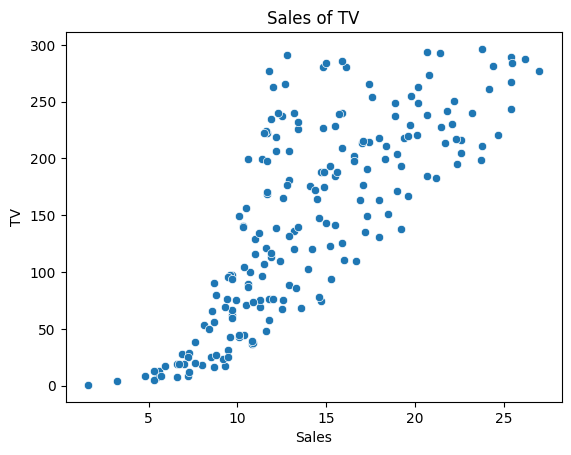

In [16]:
sns.scatterplot(df,x='Sales',y='TV')
plt.title('Sales of TV')

Text(0.5, 1.0, 'Sales of radio')

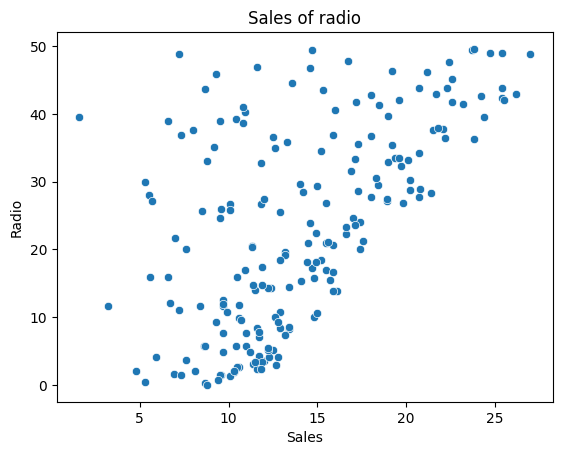

In [17]:
sns.scatterplot(df,x='Sales',y='Radio')
plt.title('Sales of radio')

Text(0.5, 1.0, 'Sales of Newspaper')

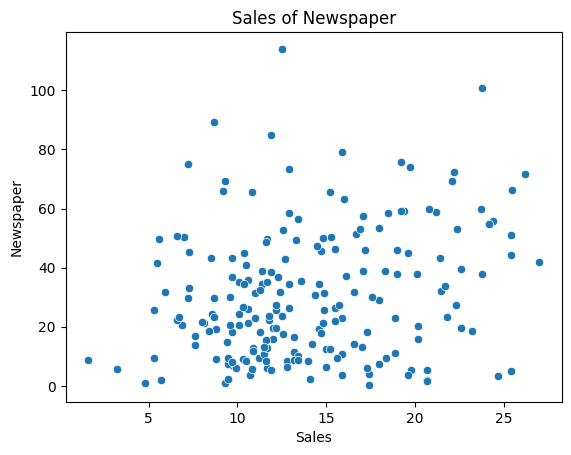

In [18]:
sns.scatterplot(df,x='Sales',y='Newspaper')
plt.title('Sales of Newspaper')

Text(0.5, 1.0, 'Sales of TV')

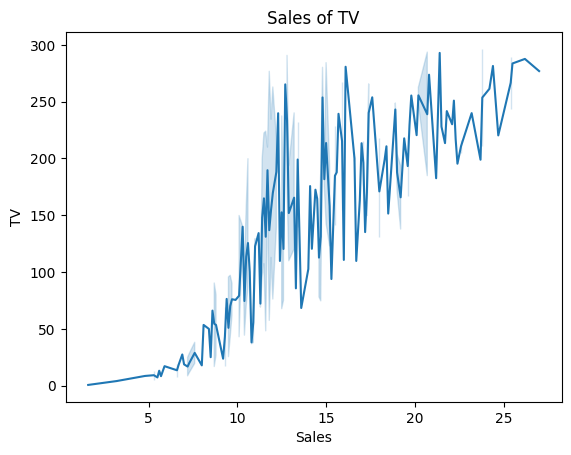

In [19]:
sns.lineplot(df,x='Sales',y='TV')
plt.title('Sales of TV')

Text(0.5, 1.0, 'Sales of radio')

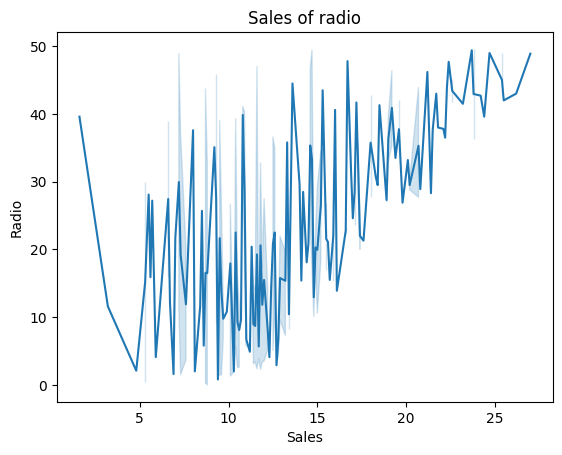

In [20]:
sns.lineplot(df,x='Sales',y='Radio')
plt.title('Sales of radio')

Text(0.5, 1.0, 'Sales of Newspaper')

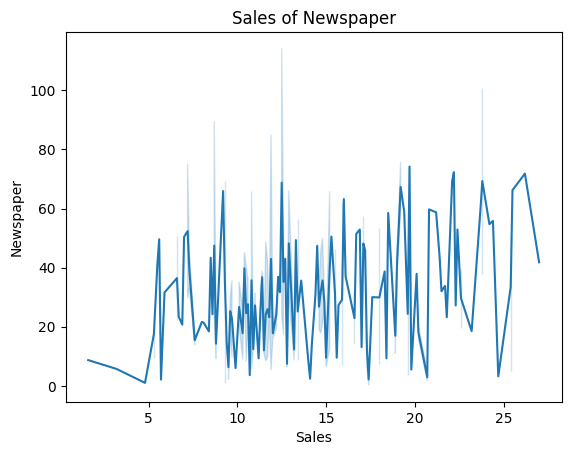

In [21]:
sns.lineplot(df,x='Sales',y='Newspaper')
plt.title('Sales of Newspaper')

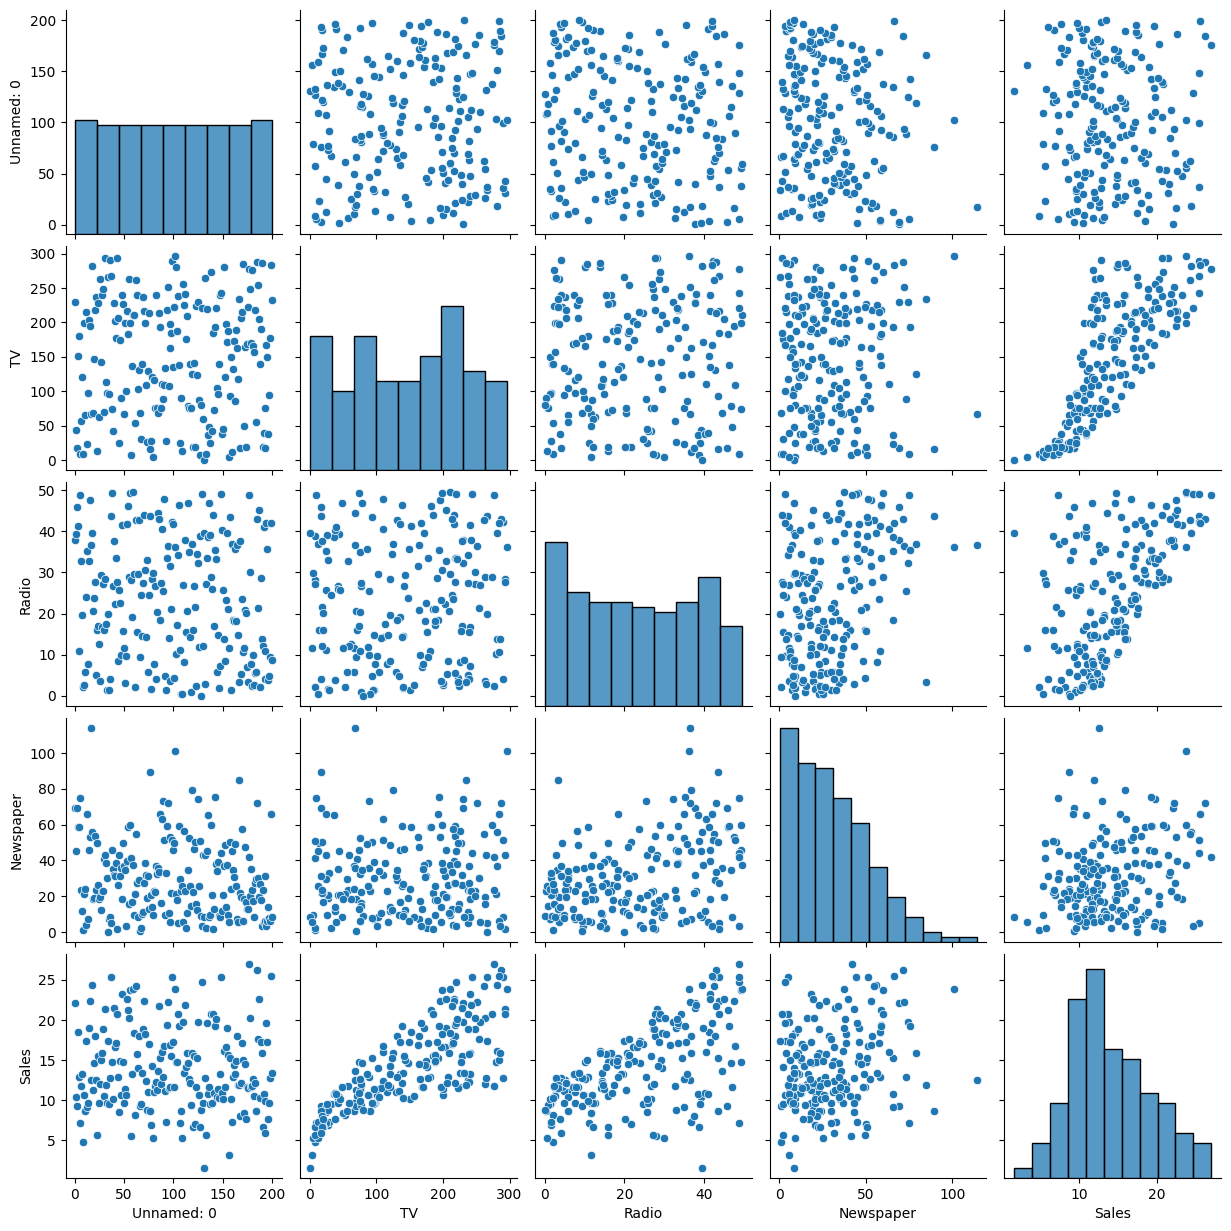

In [22]:
sns.pairplot(df)

In [23]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<Axes: >

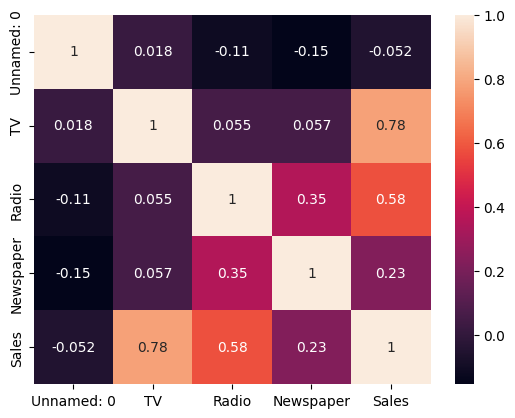

In [24]:
cor = df.corr()
sns.heatmap(cor,annot=True)

In [26]:
features = df[['TV', 'Radio', 'Newspaper']]
target = df['Sales']

In [27]:
display(features)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [28]:
display(target)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size = 0.2,random_state=3)

In [30]:
print("Training Data:\n")
display(X_train)
display(Y_train)

Training Data:



,TV,Radio,Newspaper
156,93.9,43.5,50.5
115,75.1,35.0,52.7
155,4.1,11.6,5.7
15,195.4,47.7,52.9
61,261.3,42.7,54.7
...,...,...,...
0,230.1,37.8,69.2
184,253.8,21.3,30.0
131,265.2,2.9,43.0
152,197.6,23.3,14.2


156    15.3
115    12.6
155     3.2
15     22.4
61     24.2
       ... 
0      22.1
184    17.6
131    12.7
152    16.6
106     7.2
Name: Sales, Length: 160, dtype: float64

In [31]:
print("Testing Data:\n")
display(X_test)
display(Y_test)

Testing Data:



,TV,Radio,Newspaper
40,202.5,22.3,31.6
51,100.4,9.6,3.6
139,184.9,43.9,1.7
197,177.0,9.3,6.4
170,50.0,11.6,18.4
82,75.3,20.3,32.5
183,287.6,43.0,71.8
46,89.7,9.9,35.7
70,199.1,30.6,38.7
100,222.4,4.3,49.8


40     16.6
51     10.7
139    20.7
197    12.8
170     8.4
82     11.3
183    26.2
46     10.6
70     18.3
100    11.7
179    12.6
83     13.6
25     12.0
190    10.8
159    12.9
173    11.7
95     16.9
3      18.5
41     17.1
58     23.8
14     19.0
143    10.4
12      9.2
6      11.8
182     8.7
161    13.3
128    24.7
122    11.6
101    23.8
86     12.0
64     18.0
47     23.2
158     7.3
34      9.5
38     10.1
196     9.7
4      12.9
72      8.8
67     13.4
145    10.3
Name: Sales, dtype: float64

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,Y_train)

LinearRegression()

In [34]:
from sklearn.metrics import accuracy_score
prediction_on_training = model.predict(X_train)
prediction_on_training

array([15.29960534, 12.87274007,  5.25192245, 20.70121418, 22.7781242 ,
       24.62068355, 14.36096179, 10.28419256, 16.46529542, 18.10474697,
       11.31865649, 14.67150401, 16.8206314 ,  8.33131703, 19.5255608 ,
       10.52809313, 23.12069472, 21.53727358, 15.96309937, 14.87011108,
       13.69030388,  9.89518531, 10.59535976,  8.70331574, 21.40843871,
       19.17401395,  4.49097362,  8.76564903, 15.2043697 , 17.19666136,
       12.44956074, 15.17652565, 17.56366164, 13.89162178,  7.84454092,
       17.15594287, 14.32644533,  8.10194923, 10.07735652, 19.0950662 ,
        3.692491  , 19.84770787, 16.96155874, 17.84993842, 15.56002029,
       17.17643571, 13.91765668, 12.68633552, 14.31865233,  6.51489914,
       10.53212153, 16.94648334, 14.15231123, 15.54286063, 11.81543697,
       13.07656796,  9.41539516, 18.28477144, 13.82105912, 15.08619185,
       16.91550905,  7.77522601, 12.62307249,  9.09663732, 23.99290717,
       12.91006284, 14.06478928,  3.61215223,  8.86335923, 18.82

In [35]:
print("The score of the model is:",r2_score(Y_train,prediction_on_training))

The score of the model is: 0.8930288385772915


In [36]:
prediction_on_testing_data = model.predict(X_test)
prediction_on_testing_data

array([16.29678619,  9.26361596, 19.45830733, 12.69896986,  7.35693629,
       10.13630662, 24.05157829,  8.87047296, 17.68702804, 13.89240253,
       12.32295085, 14.30587321, 15.55191065, 12.32493385, 12.35493367,
       11.90781853, 16.25923093, 17.52440317, 17.19918066, 21.73587709,
       18.3492105 ,  8.76977821, 10.57143038, 11.62914846,  6.56053195,
       13.49937253, 22.01597073, 13.57251413, 23.24678946, 11.49494839,
       16.83780927, 21.53825408, 10.32893524,  7.5361673 ,  9.85817806,
        8.11664682, 13.21200505, 10.26339272, 11.94972059,  9.66124841])

In [38]:
print("The score of the model is:",r2_score(Y_test,prediction_on_testing_data))

The score of the model is: 0.9138375011080567


In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,prediction_on_testing_data)

2.153781905661566

In [39]:
coefficient = model.coef_
coefficient

array([0.04552917, 0.18512403, 0.00119881])

In [40]:
intercept = model.intercept_
intercept

2.910980862854183

In [41]:
forecast=pd.DataFrame(data={'Forecasted Sales':prediction_on_testing_data.flatten()})
forecast

,Forecasted Sales
0,16.296786
1,9.263616
2,19.458307
3,12.698970
4,7.356936
5,10.136307
6,24.051578
7,8.870473
8,17.687028
9,13.892403
